In [3]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

In [5]:
print("Train X={} Y={}".format(train_x.shape,train_y.shape))
print("Test X={} Y={}".format(test_x.shape,test_y.shape))


Train X=(60000, 28, 28) Y=(60000,)
Test X=(10000, 28, 28) Y=(10000,)


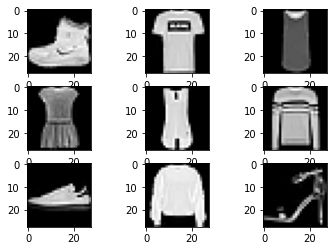

In [6]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_x[i],cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
train_x = train_x.astype('float32')
test_x = train_y.astype('float32')

train_x /= 255
test_x /= 255

In [8]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [9]:
from keras.layers import Input,Dropout
inpx = Input(shape=(28,28,1))
layer1 = Conv2D(32,kernel_size=(3,3),activation='relu')(inpx)
layer2 = Conv2D(64,kernel_size=(3,3),activation='relu')(layer1)
layer3 = MaxPool2D(pool_size=(3,3))(layer2)
# Overfitting remove
layer4 = Dropout(0.5)(layer3)

layer5 = Flatten()(layer4)
layer6 = Dense(250,activation="sigmoid")(layer5)
layer7 = Dense(10,activation="softmax")(layer6)

In [17]:
model = Model([inpx],layer7)

In [21]:
model.compile(
    optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
    )

In [22]:
model.fit(train_x,train_y,epochs=12,batch_size=500)

Epoch 1/12
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
120/120 [==============================] - 163s 1s/step - loss: 2.3912 - accuracy: 0.1013
Epoch 2/12
120/120 [==============================] - 173s 1s/step - loss: 2.3803 - accuracy: 0.1028
Epoch 3/12
120/120 [==============================] - 174s 1s/step - loss: 2.3698 - accuracy: 0.1033
Epoch 4/12
120/120 [==============================] - 153s 1s/step - loss: 

KeyboardInterrupt: 

In [23]:
# 100 epchos
# adalta 120/120 [==============================] - 1s 12ms/step - loss: 0.9006 - accuracy: 0.6767

# Rmsprop 120/120 [==============================] - 1s 12ms/step - loss: 0.0310 - accuracy: 0.9898

# Rmsprop learning rate= 0.001 120/120 [==============================] - 1s 12ms/step - loss: 0.0134 - accuracy: 0.9953


In [ ]:
test_loss,test_acc = model.evaluate(test_x,test_y)

In [ ]:
predictions  = model.predict(test_x)
print(np.argmax(np.round(predictions[1])))

In [ ]:
plt.imshow(test_x[1].reshape(28,28),cmap=plt.cm.binary)
plt.show()